<a href="https://colab.research.google.com/github/seoho0529/TensorFlow/blob/main/tfc18dogcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN을 이용하여 개, 고양이 이미지 분류 (이항분류)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt


In [2]:
data_url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
pathto_zip = keras.utils.get_file('cats_and_dogs.zip', origin=data_url, extract=True) # extract : 압축 여부
PATH = os.path.join(os.path.dirname(pathto_zip), 'cats_and_dogs_filtered')
print(PATH)

batch_size = 128
epochs=15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# 데이터 준비
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # 고양이 사진이 들어있는 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 개 사진이 들어있는 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 고양이 사진이 들어있는 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 개 사진이 들어있는 디렉토리

print(train_cats_dir) # C:\Users\SEOHO\.keras\datasets\cats_and_dogs_filtered\train\cats

num_cats_dir = len(os.listdir(train_cats_dir))
num_dogs_dir = len(os.listdir(train_dogs_dir))
print(os.listdir(train_cats_dir)[:5]) # ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_dir + num_dogs_dir
total_val = num_cats_val + num_dogs_val

# 이미지 개수 확인
print('train_train_cat : ', num_cats_dir)  # 1000
print('train_train_dog : ', num_dogs_dir)  # 1000
print('train_validation_cat : ', num_cats_val)  # 500
print('train_validation_dog : ', num_dogs_val)  # 500
print('total_train : ', total_train)  # 2000
print('total_val : ', total_val)    # 1000


/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
['cat.872.jpg', 'cat.887.jpg', 'cat.619.jpg', 'cat.525.jpg', 'cat.290.jpg']
train_train_cat :  1000
train_train_dog :  1000
train_validation_cat :  500
train_validation_dog :  500
total_train :  2000
total_val :  1000


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(128, 150, 150, 3)   (128,)
1.0 0.0


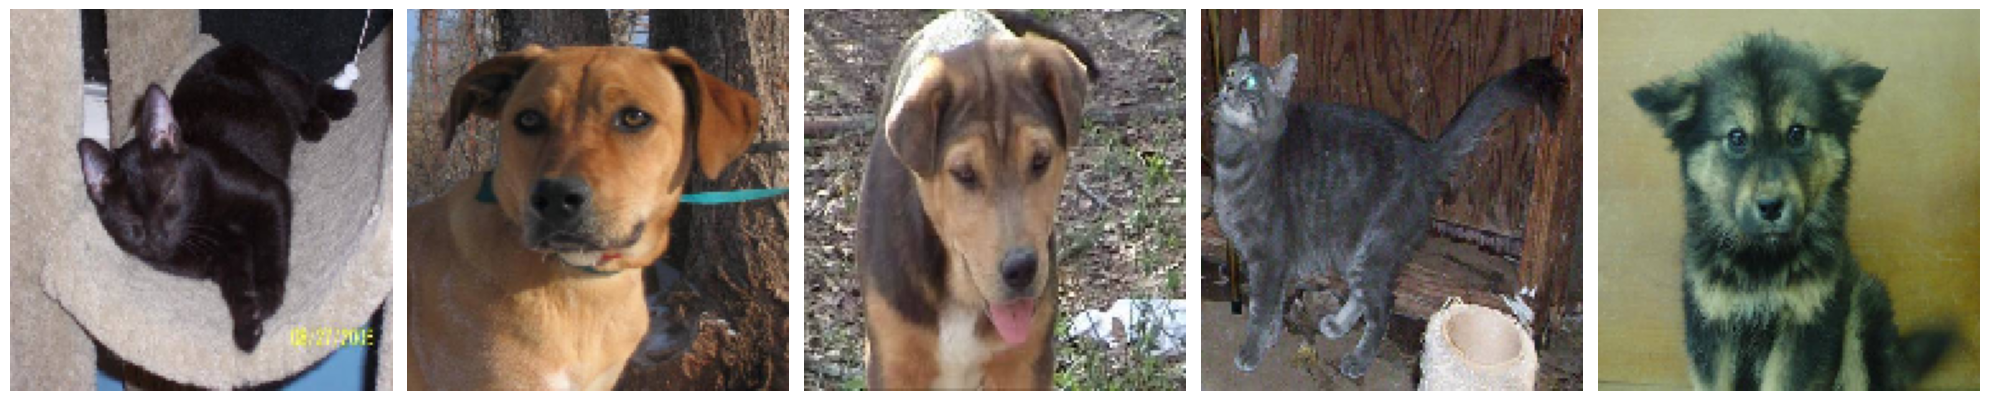

In [3]:
# 데이터를 실수 타입의 텐서로 전처리
# 두 개의 이미지에 대한 라벨링
train_image_gen = ImageDataGenerator(rescale=1. / 255.)
validation_image_gen = ImageDataGenerator(rescale=1. / 255.)

train_data_gen = train_image_gen.flow_from_directory(directory=train_dir, batch_size=batch_size, shuffle=True,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH), class_mode='binary')  # (128, 150, 150, 3)
val_data_gen = validation_image_gen.flow_from_directory(directory=validation_dir, batch_size=batch_size,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH), class_mode='binary')  # (128, 150, 150, 3)
# flow_from_directory는 batch를 무한정 만들어내기 때문에 break를 해주는 것이 좋다.
for a, b, in train_data_gen:
  print(a.shape, ' ', b.shape)
  print(b[0], b[1])
  break

for a, b, in val_data_gen:
  break


# 데이터 확인
sample_training_images, _ = next(train_data_gen)

def plotImage(img_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.axis('off')
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImage(sample_training_images[:5])
# print(sample_training_images[:1])

In [4]:
# 모델
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.2),

    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.2),

    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.2),

    Flatten(),  # 1차원으로 줄을 세워주고
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)  # 위에서 이미 class_mode를 binary라고 줬기 때문에 굳이 활성화함수를 주지 않아도 된다.
])

model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])  # 텐서를 logits으로 처리할지 - 수치적으로 안정적
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

In [5]:
# 학습
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('cat_dog.keras')

<ipython-input-5-431a89892835>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
15/15 [==============================] - 21s 458ms/step - loss: 0.7858 - accuracy: 0.4927 - val_loss: 0.6920 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 6s 425ms/step - loss: 0.6913 - accuracy: 0.4952 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 7s 468ms/step - loss: 0.6870 - accuracy: 0.5053 - val_loss: 0.6842 - val_accuracy: 0.5067
Epoch 4/15
15/15 [==============================] - 6s 421ms/step - loss: 0.6833 - accuracy: 0.5507 - val_loss: 0.6842 - val_accuracy: 0.5056
Epoch 5/15
15/15 [==============================] - 7s 458ms/step - loss: 0.6640 - accuracy: 0.5518 - val_loss: 0.6509 - val_accuracy: 0.5826
Epoch 6/15
15/15 [==============================] - 6s 424ms/step - loss: 0.6369 - accuracy: 0.6052 - val_loss: 0.6504 - val_accuracy: 0.5513
Epoch 7/15
15/15 [==============================] - 6s 416ms/step - loss: 0.5954 - accuracy: 0.6421 - val_loss: 0.6134 - val_accuracy: 0.6842
Epoch

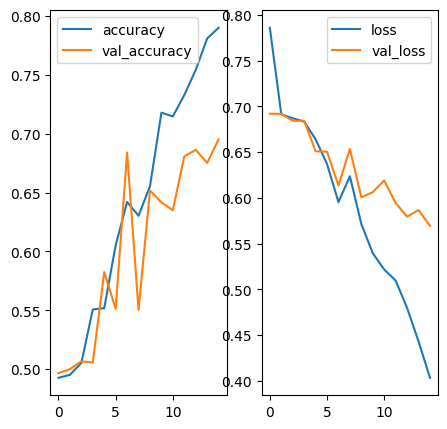

In [7]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='accuracy')
plt.plot(epochs_range, val_acc, label='val_accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='loss')
plt.plot(epochs_range, val_loss, label='val_loss')
plt.legend(loc='best')

plt.show()

In [11]:
# 새로운 이미지를 분류
import numpy as np
from google.colab import files
import tensorflow as tf

mymodel = tf.keras.models.load_model('cat_dog.keras')  # model 읽기
uploaded = files.upload()
print(uploaded.keys())   # dict_keys(['animal.jpg'])

for fn in uploaded.keys():
  path='/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x=tf.keras.utils.img_to_array(img)
  print(x.shape)  # (150, 150, 3)
  x = np.expand_dims(x, axis=0)
  print(x.shape)  # (1, 150, 150, 3)  - 차원이 늘어남

  images = np.vstack([x])  # 세로로 결합
  classes = mymodel.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0] > 0:
    print(fn + '은 댕댕이')
  else:
    print(fn + '은 냐옹이')

Saving animal.jpg to animal.jpg
dict_keys(['animal.jpg'])
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 196ms/step
[[330.5724]]
[330.5724]
animal.jpg은 댕댕이
